# Project: Wrangle and Analyze Data

## Introduction

In this project I seek to undergo the various steps that are undertaken in the process of data analysis. 
The processes include:
* Gathering data
* Assessing data
* Cleaning data
* Storing data
* Analyzing and visualizing data

In [1859]:
#Setting up the project environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import tweepy
from tweepy import OAuthHandler
import json
import timeit
from timeit import default_timer as timer
import datetime
import os
import re

# Gathering Data

In [1860]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [1861]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(r.content)
    
#viewing the sample data from the tsv file
df_img_prediction = pd.read_csv('image-predictions.tsv', sep ='\t')

In [1862]:
tweet_list = []


with open('tweet-json.txt', 'r')as f:
    for line in f:
        tweets = json.loads(line)
        tweet_list.append({'tweet_id': tweets['id'],
                          'retweet_count': tweets['retweet_count'],
                          'favorite_count': tweets['favorite_count']
                          })
    
df_tweetJson = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

# Assessing Data

In [1863]:
#Assessing the data from the twitter archive csv for quality issues
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [1864]:
#returning random entries for the dataset
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1721,680130881361686529,NaN,NaN,2015-12-24 21:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. His Santa hat is a little big....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680130881...,10,10,Reggie,None,None,None,None
849,766008592277377025,NaN,NaN,2016-08-17 20:27:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Angel. She stole the @ShopWeRateDogs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766008592...,11,10,Angel,None,None,None,None
1137,728046963732717569,NaN,NaN,2016-05-05 02:21:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He controls fountains with hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728046963...,11,10,Raymond,None,None,None,None
1846,675822767435051008,NaN,NaN,2015-12-12 23:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675822767...,10,10,None,None,None,None,None
566,802247111496568832,NaN,NaN,2016-11-25 20:26:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody drop what you're doin...,7.790561e+17,4.196984e+09,2016-09-22 20:33:42 +0000,https://twitter.com/dog_rates/status/779056095...,13,10,None,None,None,None,None
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,None,floofer,None,None
1735,679729593985699840,NaN,NaN,2015-12-23 18:25:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He was playing with his ball m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679729593...,8,10,Hunter,None,None,None,None
1818,676593408224403456,NaN,NaN,2015-12-15 02:43:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,NaN,NaN,NaN,https://vine.co/v/eEQQaPFbgOY,11,10,None,None,None,pupper,None
403,824297048279236611,NaN,NaN,2017-01-25 16:45:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She got in trouble. One h*ck of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824297048...,11,10,Nala,None,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None


* Dogs with the name 'a' seem like a typo

In [1865]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Several columns have missing data

_assessing_ _tweet_ _replies_

In [1866]:
tweet_replies = df_archive[df_archive.in_reply_to_status_id.notnull()]

tweet_replies

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [1867]:
#assessing the rating columns for statistical inferencing purposess
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


* The mean rating numerator is 13.1265
* The mean rating denominator is 10.4555
* The minimum rating numerator and denominator is 0
* The maximum rating numerator is 1776
* The maximum rating denominator is 170

In [1868]:
# finding the  most popular numerator ratings by value counts
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

The modal numerator rating is 12

In [1869]:
# finding the most popular denominator ratings by value counts
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

The modal denominator rating is 10

In [1870]:
#checking the number of unique dog names
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [1871]:
sum(df_archive['name']=='Klevin')

3

In [1872]:
sum(df_archive['name']=='an')

7

In [1873]:
sum(df_archive['name']=='quite')

4

* Dogs with the names 'a', 'an', 'quite' and 'Klevin' seem erroneous

In [1874]:
print(df_archive.name.nunique())

957


In [1875]:
#assessing the number of dogs by their various stages
df_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [1876]:
df_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [1877]:
df_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [1878]:
df_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

Information on the dog stages mostly has missing values.
* Dogs in the pupper stage are the most, followed by the ones in doggo

In [1879]:
#checking for duplicates
sum(df_archive['tweet_id'].duplicated())

0

In [1880]:
df_archive[df_archive.tweet_id == 786709082849828864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


* Rating numerators seem to be incorrectly captured. According to the text, the rating should be 9.75 yet it is captured as 75

In [1881]:
#Assessing the data from the image predictions tsv for quality issues
df_img_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1882]:
#returning random entries for the dataset
df_img_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
897,699775878809702401,https://pbs.twimg.com/media/CbYac83W4AAUH1O.jpg,1,Dandie_Dinmont,0.271683,True,Old_English_sheepdog,0.164931,True,otterhound,0.105918,True
1320,756288534030475264,https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg,3,conch,0.925621,False,French_bulldog,0.032492,True,tiger_cat,0.006679,False
1272,750011400160841729,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,1,muzzle,0.237620,False,Boston_bull,0.087150,True,sombrero,0.068510,False
439,674436901579923456,https://pbs.twimg.com/media/CVwUyM9WwAAGDjv.jpg,1,acorn_squash,0.375392,False,Shih-Tzu,0.105416,True,Lhasa,0.072832,True
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
577,678740035362037760,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,1,seat_belt,0.787164,False,sunglasses,0.045739,False,beagle,0.022525,True
289,671163268581498880,https://pbs.twimg.com/media/CVBzbWsWsAEyNMA.jpg,1,African_hunting_dog,0.733025,False,plow,0.119377,False,Scottish_deerhound,0.026983,True
1972,869596645499047938,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False
1553,793165685325201412,https://pbs.twimg.com/media/CwHj-jGWAAAnsny.jpg,1,golden_retriever,0.946224,True,Labrador_retriever,0.036477,True,doormat,0.002353,False
1326,757354760399941633,https://pbs.twimg.com/media/CoKqIndWgAAattd.jpg,1,Italian_greyhound,0.914667,True,whippet,0.047774,True,ice_lolly,0.015477,False


In [1883]:
df_img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are no columns with missing data

In [1884]:
#checking for duplicates
sum(df_img_prediction.tweet_id.duplicated())

0

In [1885]:
#Assessing the data from the json text files for quality issues
df_tweetJson.head(20)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [1886]:
#returning random entries for the dataset
df_tweetJson.sample(10)

,tweet_id,retweet_count,favorite_count
323,834086379323871233,2512,14296
1387,700167517596164096,836,2903
891,759446261539934208,561,1846
1792,677328882937298944,1693,3938
1763,678410210315247616,2072,4640
419,822163064745328640,5571,0
1565,687826841265172480,1292,2989
726,782305867769217024,6470,18630
881,760252756032651264,995,4338
1248,711008018775851008,710,3275


In [1887]:
df_tweetJson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [1888]:
#checking for duplicates
sum(df_tweetJson.tweet_id.duplicated())

0

In [1889]:
df_tweetJson[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


* The highest number of retweet counts is about 79.5k
* The highest number of likes is about 133k

## Quality

* only original ratings (no retweets). All tweets should have images
* There are columns with missing data
* The timestamp column is not in the date/time data format
* The source column is formatted in html
* Innacurate data in the name column of the twitter archive
* Column 'tweet_id' should be formatted as a string
* Standardizing the dog breed names in image predictions to all start with a capital letter
* Rating numerators do not capture ratings with decimal values

## Tidiness

* The dog stage names 'doggo', 'floofer', 'pupper' and 'puppo' should be in a single column called 'dog_stage'

**_quality_** - changing the datatype of the 'dog_stage' into category

Combine the datasets into one master dataset


# Cleaning Data

This process involves three steps:
* Define- _define_ how you will clean the issue in words
* Code- _convert_ your definitions into executable code
* Test- _testing_ your data to ensure your code was implemented correctly

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
## _Quality_

### Define
* Create a clean copy of the datasets

### Code


In [1890]:
# creating the copies of the datasets
clean_archive = df_archive.copy()
clean_imgPrediction = df_img_prediction.copy()
clean_tweetJson = df_tweetJson.copy()

### Test

In [1891]:
clean_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [1892]:
clean_imgPrediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1893]:
clean_tweetJson.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Define
* Remove retweets

### Code


In [1894]:
clean_archive = clean_archive[clean_archive.retweeted_status_id.isnull()]

### Test

In [1895]:
clean_archive['retweeted_status_id'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2175 entries, 0 to 2355
Series name: retweeted_status_id
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 34.0 KB


### Define
* Remove the columns with missing data.

### Code

In [1896]:
clean_archive.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace=True)


### Test

In [1897]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Define
* Changing the timestamp column into the date type format

### Code

In [1898]:
clean_archive['timestamp'] = pd.to_datetime(clean_archive['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f%Z')

### Test

In [1899]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 203.9+ KB


### Define
* Extracting the text in the source column from the html format

### Code

In [1900]:
clean_archive['source'] =  clean_archive.source.str.extract('(?:.*>)([a-zA-Z-\s]+)(?:.*<)')

### Test

In [1901]:
clean_archive.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1055,742385895052087300,2016-06-13 15:59:24+00:00,Twitter for iPhone,This is Phil. That's his comfort stick. He hol...,11,10,Phil,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None
1378,701570477911896070,2016-02-22 00:53:31+00:00,Twitter for iPhone,This is Yoda. He's a Zimbabwean Rutabaga. Frea...,9,10,Yoda,None,None,None,None
676,789314372632018944,2016-10-21 03:56:25+00:00,Twitter for iPhone,HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOO...,13,10,None,None,None,None,None
1468,694206574471057408,2016-02-01 17:11:59+00:00,Twitter for iPhone,"""Martha come take a look at this. I'm so fed u...",10,10,None,None,None,None,None
1233,712809025985978368,2016-03-24 01:11:29+00:00,Twitter for iPhone,This is Stubert. He just arrived. 10/10 https:...,10,10,Stubert,None,None,None,None
1689,681340665377193984,2015-12-28 05:07:27+00:00,Twitter for iPhone,I've been told there's a slight possibility he...,5,10,None,None,None,None,None
1482,693267061318012928,2016-01-30 02:58:42+00:00,Vine - Make a Scene,This is Oscar. He can wave. Friendly af. 12/10...,12,10,Oscar,None,None,None,None
1622,684914660081053696,2016-01-07 01:49:14+00:00,Twitter for iPhone,"""Hello yes I'll just get one of each color tha...",12,10,None,None,None,None,None
1673,682303737705140231,2015-12-30 20:54:22+00:00,Twitter for iPhone,This is Todo. He's screaming because he doesn'...,9,10,Todo,None,None,None,None


In [1902]:
clean_tweetJson.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Define
* Fixing the naming issues in the name column.

### Code

In [1903]:
clean_archive['name'].replace('Klevin', 'Kelvin', inplace=True)
clean_archive['name'][clean_archive.name.str.match('^[a-z0-9_\-]+$')] = 'None'

C:\Users\joshu\AppData\Local\Temp\ipykernel_5536\2423611912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_archive['name'][clean_archive.name.str.match('^[a-z0-9_\-]+$')] = 'None'


### Test

In [1904]:
sum(clean_archive['name']=='Klevin')

0

In [1905]:
mask = clean_archive.name.str.contains('^[a-z]', regex = True)
clean_archive[mask].name.value_counts().sort_index()

Series([], Name: name, dtype: int64)

In [1906]:
clean_archive.name.value_counts()

None          784
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

### Define
* Formatting 'tweet_id' columns in the three tables as strings

### Code

In [1907]:
clean_archive['tweet_id']= clean_archive['tweet_id'].map(str)
clean_imgPrediction['tweet_id']= clean_imgPrediction['tweet_id'].map(str)
clean_tweetJson['tweet_id']= clean_tweetJson['tweet_id'].map(str)

### Test

In [1908]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 203.9+ KB


In [1909]:
clean_imgPrediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [1910]:
clean_tweetJson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Define
* Correcting the rating columns

### Code

In [1911]:
ratings = clean_archive.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
clean_archive.rating_numerator = ratings[0]
clean_archive.rating_denominator = ratings[1]

### Test

In [1912]:
clean_archive[clean_archive['tweet_id']== '786709082849828864']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",9.75,10,Logan,None,None,None,None


### Define
* Changing the rating columns to type float 

### Code

In [1913]:
clean_archive.rating_numerator = clean_archive.rating_numerator.astype(float)
clean_archive.rating_denominator = clean_archive.rating_denominator.astype(float)

### Test

In [1914]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(8)
memory usage: 203.9+ KB


In [1915]:
clean_archive[clean_archive['tweet_id']== '786709082849828864']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",9.75,10.0,Logan,None,None,None,None


### Define
* Dropping columns that aren't needed for analysis

### Code

In [1916]:
clean_imgPrediction.drop(['p1_conf', 'p2_conf', 'p3_conf'], axis=1, inplace=True)

### Test

In [1917]:
clean_imgPrediction.head()

,tweet_id,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,True,collie,True,Shetland_sheepdog,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,True,malinois,True,bloodhound,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,True,Rottweiler,True,Doberman,True


In [1918]:
clean_tweetJson.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Define
* Changing all the names in p1, p2 and p3 columns to begin with Capital letters

### Code

In [1919]:
clean_imgPrediction['p1'] = clean_imgPrediction['p1'].str.capitalize()
clean_imgPrediction['p2'] = clean_imgPrediction['p2'].str.capitalize()
clean_imgPrediction['p3'] = clean_imgPrediction['p3'].str.capitalize()

### Test

In [1920]:
clean_imgPrediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog
602,679828447187857408,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,Chihuahua,True,Dalmatian,True,Toy_terrier,True
1622,803380650405482500,https://pbs.twimg.com/media/CyYub2kWEAEYdaq.jpg,1,Bookcase,False,Entertainment_center,False,File,False
1102,721001180231503872,https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg,1,Samoyed,True,Washbasin,False,Tub,False
60,667138269671505920,https://pbs.twimg.com/media/CUImtzEVAAAZNJo.jpg,1,West_highland_white_terrier,True,Samoyed,True,Toy_poodle,True
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,Limousine,False,Tow_truck,False,Shopping_cart,False
1121,726887082820554753,https://pbs.twimg.com/media/ChZr8SdWIAAVQKt.jpg,1,Soft-coated_wheaten_terrier,True,Irish_terrier,True,Chesapeake_bay_retriever,True
1410,770655142660169732,https://pbs.twimg.com/media/CrHqwjWXgAAgJSe.jpg,1,Madagascar_cat,False,Skunk,False,Paper_towel,False
657,682303737705140231,https://pbs.twimg.com/media/CXgHoLnWAAA8i52.jpg,1,Seat_belt,False,Lakeland_terrier,True,Airedale,True
295,671357843010908160,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,1,Italian_greyhound,True,Toy_terrier,True,Chihuahua,True
1643,808001312164028416,https://pbs.twimg.com/media/CzaY5UdUoAAC91S.jpg,1,Labrador_retriever,True,Staffordshire_bullterrier,True,American_staffordshire_terrier,True


## _Tidiness_

### Define
* Merging 'doggo', 'floofer'. 'pupper' and 'puppo' into one column called 'dog_stage'

### Code

In [1921]:
clean_archive.doggo.replace(np.NaN, '', inplace=True)
clean_archive.floofer.replace(np.NaN, '', inplace=True)
clean_archive.pupper.replace(np.NaN, '', inplace=True)
clean_archive.puppo.replace(np.NaN, '', inplace=True)
clean_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

clean_archive['dog_stage'] = clean_archive.doggo + clean_archive.floofer + clean_archive.pupper + clean_archive.puppo
clean_archive.loc[clean_archive.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
clean_archive.loc[clean_archive.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
clean_archive.loc[clean_archive.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [1922]:
clean_archive['dog_stage'] =  clean_archive.dog_stage.str.replace(r'\BNone', '')
clean_archive['dog_stage'] =  clean_archive.dog_stage.str.replace(r'\bNone', '')

C:\Users\joshu\AppData\Local\Temp\ipykernel_5536\1635600505.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_archive['dog_stage'] =  clean_archive.dog_stage.str.replace(r'\BNone', '')
C:\Users\joshu\AppData\Local\Temp\ipykernel_5536\1635600505.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_archive['dog_stage'] =  clean_archive.dog_stage.str.replace(r'\bNone', '')


### Test

In [1923]:
clean_archive.dog_stage.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

### Define
* Dropping the extracted dog stage columns

### Code

In [1924]:
clean_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test

In [1925]:
clean_archive.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
248,845397057150107648,2017-03-24 22:08:59+00:00,Twitter for iPhone,Say hello to Mimosa. She's an emotional suppor...,13.0,10.0,Mimosa,doggo
1899,674670581682434048,2015-12-09 19:22:56+00:00,Twitter for iPhone,Meet Jeb &amp; Bush. Jeb is somehow stuck in t...,9.0,10.0,Jeb,
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,None,
1289,708149363256774660,2016-03-11 04:35:39+00:00,Twitter for iPhone,This is Jebberson. He's the reigning hide and ...,10.0,10.0,Jebberson,
1775,678021115718029313,2015-12-19 01:16:45+00:00,Twitter for iPhone,This is Reese. He likes holding hands. 12/10 h...,12.0,10.0,Reese,
1389,700167517596164096,2016-02-18 03:58:39+00:00,Twitter for iPhone,This is Dotsy. She's stuck as hell. 10/10 http...,10.0,10.0,Dotsy,
1728,679872969355714560,2015-12-24 03:55:21+00:00,Vine - Make a Scene,This is Rocco. He's in a very intense game of ...,10.0,10.0,Rocco,
1406,699088579889332224,2016-02-15 04:31:20+00:00,Twitter for iPhone,This is Charl. He's a bully. Chucks that dumbb...,3.0,10.0,Charl,
865,762316489655476224,2016-08-07 15:56:28+00:00,Twitter for iPhone,This is Scout. He specializes in mid-air freez...,11.0,10.0,Scout,
2248,667866724293877760,2015-11-21 00:46:50+00:00,Twitter for iPhone,This is Shaggy. He knows exactly how to solve ...,10.0,10.0,Shaggy,


### Define
* Merge the datasets to form one master set

### Code

In [1926]:
clean_archive = pd.merge(left=clean_archive, right=clean_imgPrediction, how='left', on='tweet_id')
clean_archive = pd.merge(left=clean_archive, right=clean_tweetJson, how='left', on='tweet_id')

### Test

In [1927]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   dog_stage           2175 non-null   object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   float64            
 10  p1                  1994 non-null   object             
 11  p1_dog              1994 non-null   object             
 12  p2                  1994 non-null 

### Define
* Remove tweets with no images

### Code

In [1928]:
clean_archive = clean_archive[clean_archive.img_num.notnull()]

### Test

In [1929]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   float64            
 5   rating_denominator  1994 non-null   float64            
 6   name                1994 non-null   object             
 7   dog_stage           1994 non-null   object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   float64            
 10  p1                  1994 non-null   object             
 11  p1_dog              1994 non-null   object             
 12  p2                  1994 non-null 

# Storing Data

In [1930]:
clean_archive.to_csv('clean_archive.csv', index=False)

In [1931]:
twitter_archive_master = pd.read_csv('clean_archive.csv')

In [1932]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,False,Bagel,False,Banana,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,True,Pekinese,True,Papillon,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,True,Malamute,True,Kelpie,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_towel,False,Labrador_retriever,True,Spatula,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,True,English_springer,True,German_short-haired_pointer,True,9774,41048


In [1933]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   rating_numerator    1994 non-null   float64
 5   rating_denominator  1994 non-null   float64
 6   name                1994 non-null   object 
 7   dog_stage           306 non-null    object 
 8   jpg_url             1994 non-null   object 
 9   img_num             1994 non-null   float64
 10  p1                  1994 non-null   object 
 11  p1_dog              1994 non-null   bool   
 12  p2                  1994 non-null   object 
 13  p2_dog              1994 non-null   bool   
 14  p3                  1994 non-null   object 
 15  p3_dog              1994 non-null   bool   
 16  retwee

## _Quality_

### Define
* Fixing erroneous datatypes

### Code

In [1934]:
twitter_archive_master['tweet_id']= twitter_archive_master['tweet_id'].map(str)
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f%Z')
twitter_archive_master['dog_stage'] = twitter_archive_master['dog_stage'].astype('category')
twitter_archive_master['img_num'] = twitter_archive_master['img_num'].apply(np.int64)

### Test

In [1935]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   float64            
 5   rating_denominator  1994 non-null   float64            
 6   name                1994 non-null   object             
 7   dog_stage           306 non-null    category           
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   int64              
 10  p1                  1994 non-null   object             
 11  p1_dog              1994 non-null   bool               
 12  p2                  1994 non-null 

# Analyzing and Visualizing Data

### _A general look on the data_

array([[<AxesSubplot:title={'center':'timestamp'}>,
        <AxesSubplot:title={'center':'rating_numerator'}>],
       [<AxesSubplot:title={'center':'rating_denominator'}>,
        <AxesSubplot:title={'center':'img_num'}>],
       [<AxesSubplot:title={'center':'retweet_count'}>,
        <AxesSubplot:title={'center':'favorite_count'}>]], dtype=object)

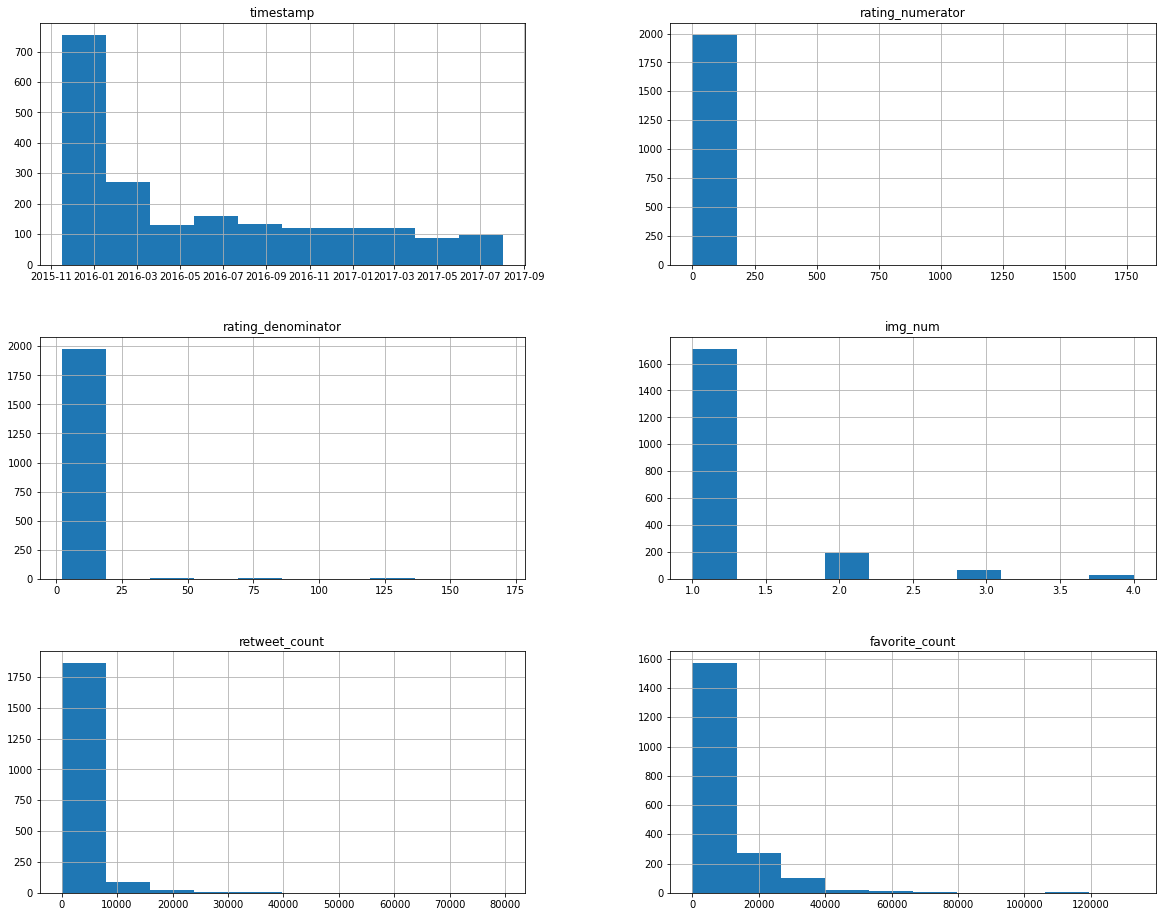

In [1936]:
twitter_archive_master.hist(figsize= (20,16))

* The number of tweets seemed to decrease over time; with the highest tweet activity being in the late months of the year 2015 and early 2016
* Most people post one picture per tweet with the number tending to decrease as the number of images increase

**Finding out the most Popular dog name**

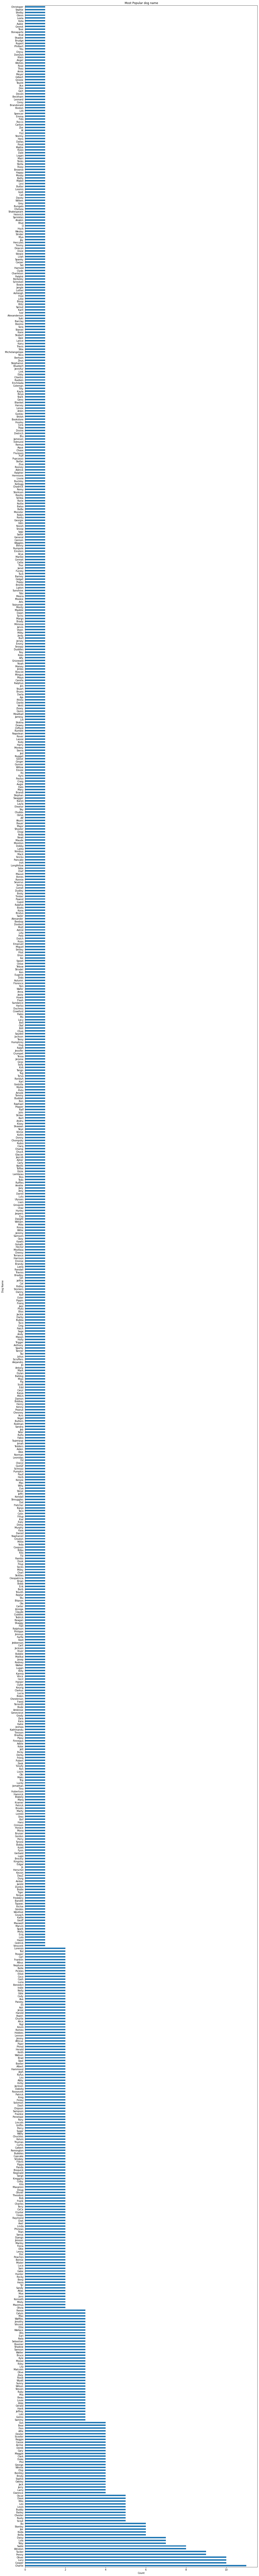

In [1937]:
filt = ~(twitter_archive_master['name'] == 'None')#filtering out dogs without a name
plt.figure(figsize=[17.70, 200])
df = twitter_archive_master[filt].name.value_counts()
df.plot(kind= 'barh')
plt.title('Most Popular dog name')
plt.xlabel('Count')
plt.ylabel('Dog Name');

* The most popular dog is Charlie with a count of 11, followed by Oliver, Cooper and Lucy with a count of 10

**Finding out the most Popular twitter platform**

Text(0.5, 1.0, 'Most Popular Twitter Platform')

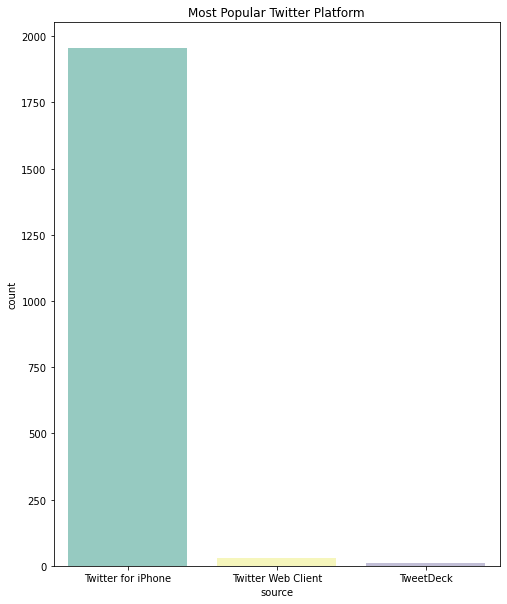

In [1938]:
plt.figure(figsize = (8,10))
ax=sns.countplot(x='source', data=twitter_archive_master, palette="Set3")
ax.set_title("Most Popular Twitter Platform", fontsize = 12)

* The most popular tweeting platform is iPhone with 1955 tweets.

It seems like most users on the 'we rate dogs' platform take pictures of their dogs using iphones

**Finding the dog stage with the highest number**

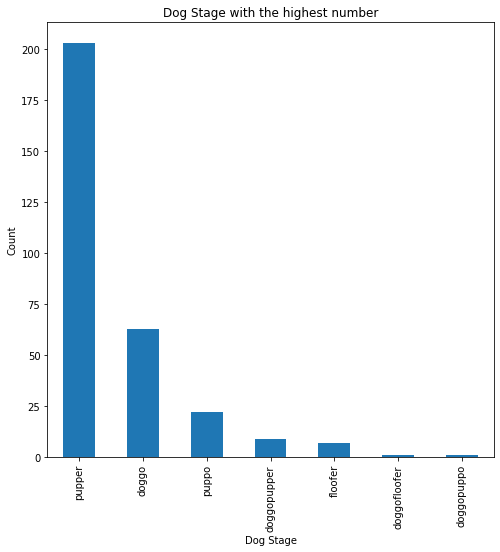

In [1939]:
df1 = twitter_archive_master[twitter_archive_master['dog_stage'].notnull()]
plt.figure(figsize = (8,8))
df1['dog_stage'].value_counts().plot(kind ='bar')
plt.title('Dog Stage with the highest number')
plt.xlabel('Dog Stage')
plt.ylabel('Count');

* The dog stage with the highest number is the pupper stage with 224